In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

SyntaxError: ignored

In [16]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

#to_drop = [] - no column to drop - all of the columns in the dataset are related to diabetes and there's no extraneous information

#df = df.set_index('Glucose') - there are no unique identifier values in any of the columns so I wouldn't use any of them as the index

#turn the continuous variable of glucose level into a categorical level indicating whether the level is normal, prediabetic, or diabetic, as per the CDC's guidelines
#https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=A%20fasting%20blood%20sugar%20level,higher%20indicates%20you%20have%20diabetes.
category = pd.cut(df.Glucose, bins = [0,99,125,300], labels = ['normal','prediabetes','diabetes'])
df.insert(1, 'Glucose Category', category)
df.sample(10)

#turn the continuous variable of age into a cateogrical measure, based o nthe age ranges indicated by the CDC to have jumps in diabetes risks
#https://www.medicalnewstoday.com/articles/317375#:~:text=The%20risk%20of%20developing%20diabetes,those%20aged%20over%2065%20years.
category1 = pd.cut(df.Age, bins = [0,18,45,65,151], labels = ['0-17', '18-44','45-64','>65'])
df.insert(9, 'Age Category', category1)
df.sample(10)

Pregnancies Glucose Category  Glucose  BloodPressure  SkinThickness  \
96             2           normal       92             62             28   
755            1         diabetes      128             88             39   
309            2      prediabetes      124             68             28   
357           13         diabetes      129              0             30   
40             3         diabetes      180             64             25   
709            2           normal       93             64             32   
191            9      prediabetes      123             70             44   
272            3      prediabetes      122             78              0   
760            2           normal       88             58             26   
656            2      prediabetes      101             58             35   

     Insulin   BMI  DiabetesPedigreeFunction  Age Age Category  Outcome  
96         0  31.6                     0.130   24        18-44        0  
755      110  36.5                     1.057   37        18-44        1  
309      205  32.9                     0.875   30        18-44        1  
357        0  39.9                     0.569   44        18-44        1  
40        70  34.0                     0.271   26        18-44        0  
709      160  38.0                     0.674   23        18-44        1  
191       94  33.1                     0.374   40        18-44        0  
272        0  23.0                     0.254   40        18-44        0  
760       16  28.4                     0.766   22        18-44        0  
656       90  21.8                     0.155   22        18-44        0

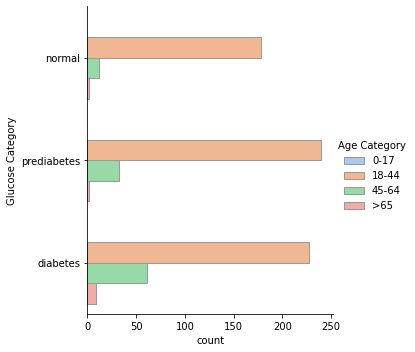

In [22]:
#this visualization helps me see that, first, the data is heavily skewed towards eole in the 18-44 age range
#it also shows that there might not be that much correlation between age and glucose levels
sns.catplot(y="Glucose Category", hue="Age Category", kind="count", palette="pastel", edgecolor=".6", data=df)

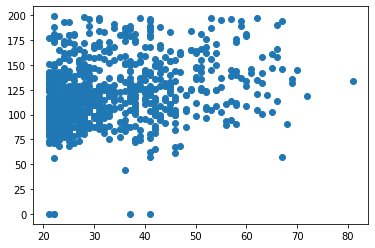

In [26]:
#this scatter plot drives home that there isn't really a notable correlation between age and glucose levels 
#I used the continuous variables for this visualization because its a scatter plot, whereas for the bar graph above I used the categorical columns
x = df['Age']
y = df['Glucose']
plt.xlabel = ('Age')
plt.ylabel = ('Glucose')
plt.scatter(x,y)

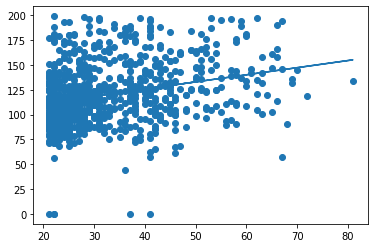

In [28]:
#the linear regressio nvisualization allso indicates that there isn't a huge correlatrion between glucose levels and age. #
#There is a very slight indication that as aage increases so does Glucose level
from sklearn.linear_model import LinearRegression

x = df['Age'].values.reshape(-1,1)
y = df['Glucose']

lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

plt.scatter(x, y)


plt.plot(x, y_pred)

In [31]:
sp.posthoc_ttest(adf, val_col='Glucose', group_col='Age', p_adjust='holm')

NameError: ignored